In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/

/content/gdrive/MyDrive/Colab Notebooks


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from scipy import stats
from sklearn.metrics.pairwise import linear_kernel # for cosine similarity
from sklearn.feature_extraction.text import TfidfVectorizer # for vector

In [4]:
# read the dataset
games = pd.read_csv('all_games.csv')

In [5]:
# see the first five games from the dataframe
games.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [6]:
# see the number of collumns and rows
games.shape

(18800, 6)

In [7]:
# drop duplicates
games.drop_duplicates('name',keep='first', inplace=True)
games.reset_index(drop=True, inplace=True)

games

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Super Mario Galaxy,Wii,"November 12, 2007",[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1
...,...,...,...,...,...,...
12249,Charlie's Angels,GameCube,"July 9, 2003","Join Natalie, Dylan, and Alex for an intense a...",23,4.3
12250,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
12251,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
12252,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9


In [8]:
# check for null
games.isnull().sum()

name              0
platform          0
release_date      0
summary         101
meta_score        0
user_review       0
dtype: int64

In [9]:
# drop the nulls 
null_rows = games[games['summary'].isnull()].index
games.drop(index=null_rows, inplace=True)
games

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Super Mario Galaxy,Wii,"November 12, 2007",[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1
...,...,...,...,...,...,...
12249,Charlie's Angels,GameCube,"July 9, 2003","Join Natalie, Dylan, and Alex for an intense a...",23,4.3
12250,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
12251,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
12252,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9


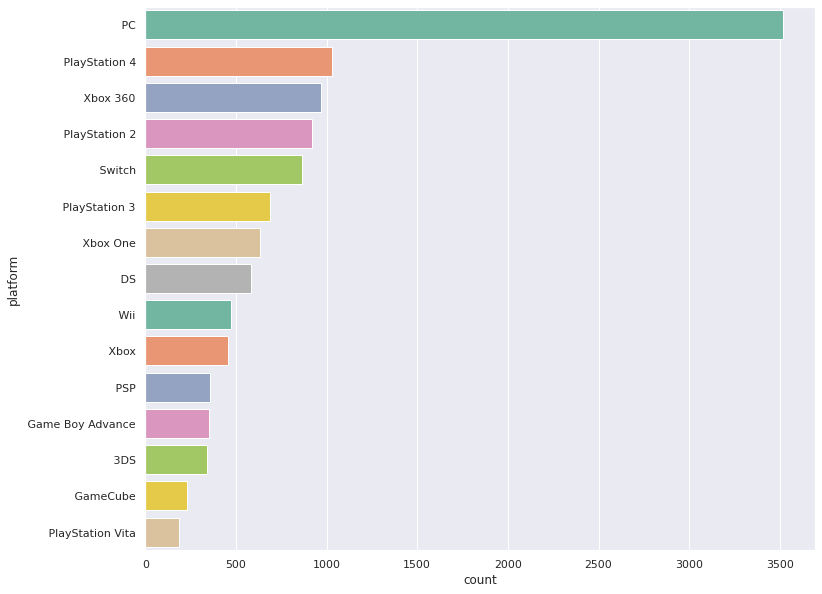

In [10]:
# showing platform of all games  
plt.figure (figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='platform', data=games, palette="Set2", order=games['platform'].value_counts().index[0:15])

In [11]:
# copy all values on summary to new collumn called proc_result
# preprocessing results stored at proc_result
games['proc_result'] = games['summary']

In [12]:
games.head()

,name,platform,release_date,summary,meta_score,user_review,proc_result
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,"As a young boy, Link is tricked by Ganondorf, ..."
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,As most major publishers' development efforts ...
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,[Metacritic's 2008 PS3 Game of the Year; Also ...
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4,"This is a tale of souls and swords, transcendi..."
4,Super Mario Galaxy,Wii,"November 12, 2007",[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1,[Metacritic's 2007 Wii Game of the Year] The u...


In [13]:
# preprocessing time (cleaning, convert to lower, etc)
# converting to lower 
def convert_lower(text):
    return text.lower()

games['proc_result']=games['proc_result'].apply(convert_lower)

In [14]:
# removing special characters in those words 
def remove_special(text):
        x=''
        for i in text:
            if i.isalnum():
                x=x+i
            else:
                x=x+' '
        return x

games['proc_result']=games['proc_result'].apply(remove_special)

In [15]:
# remove stopwords
import nltk
nltk.download('stopwords')
def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y
    
games['proc_result']=games['proc_result'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# convert the words to vector
tfidf = TfidfVectorizer()

In [17]:
# construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform([str(i) for i in games['proc_result']])

In [18]:
# output the shape of tfidf_matrix
tfidf_matrix.shape

(12153, 36889)

In [19]:
# compute the cosine similarity matrix
cosine_sim_vector = linear_kernel(tfidf_matrix, tfidf_matrix)

In [20]:
cosine_sim_vector

array([[1.        , 0.        , 0.02346347, ..., 0.        , 0.00589716,
        0.01439123],
       [0.        , 1.        , 0.0081406 , ..., 0.        , 0.01023518,
        0.        ],
       [0.02346347, 0.0081406 , 1.        , ..., 0.        , 0.        ,
        0.03236019],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.02294747,
        0.01541149],
       [0.00589716, 0.01023518, 0.        , ..., 0.02294747, 1.        ,
        0.        ],
       [0.01439123, 0.        , 0.03236019, ..., 0.01541149, 0.        ,
        1.        ]])

In [21]:
cosine_sim_vector.shape

(12153, 12153)

In [22]:
indices = pd.Series(games.index, index=games['name']).drop_duplicates()

indices[:20]

name
The Legend of Zelda: Ocarina of Time                              0
Tony Hawk's Pro Skater 2                                          1
Grand Theft Auto IV                                               2
SoulCalibur                                                       3
Super Mario Galaxy                                                4
Super Mario Galaxy 2                                              5
Red Dead Redemption 2                                             6
Grand Theft Auto V                                                7
Disco Elysium: The Final Cut                                      8
The Legend of Zelda: Breath of the Wild                           9
Tony Hawk's Pro Skater 3                                         10
Perfect Dark                                                     11
Metroid Prime                                                    12
Grand Theft Auto III                                             13
Super Mario Odyssey                        

In [27]:
# create a function, the game's name is the input and will produce outputs of most similar games
def game_recommendation_results(name, cosine_sim_vector=cosine_sim_vector):
    # get the index of the game that matches the game's name
    idx = indices[name]

    # get the pairwsie similarity scores of all games with the input games
    sim_scores = list(enumerate(cosine_sim_vector[idx]))

    # sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # get the scores of the 20 most similar games
    sim_scores = sim_scores[1:21]

    # get the games indices
    games_indices = [i[0] for i in sim_scores]

    # return the results of top 20 most similar games from the input
    result = games['name'].iloc[games_indices]
    return result

In [28]:
# Nintendo Platform
game_recommendation_results('Super Mario Galaxy')

2183                               Mario Kart Wii
763                     New Super Mario Bros. Wii
103                          Super Mario 3D World
2109                     Super Mario 3D All-Stars
9970                             Wii Play: Motion
10527                                    Wii Play
7627                         Mario Super Sluggers
14                            Super Mario Odyssey
9537                           Mario Pinball Land
166      Super Mario World: Super Mario Advance 2
11898                              Furu Furu Park
5                            Super Mario Galaxy 2
4622                     Mario & Luigi: Paper Jam
289                                 Mario Kart DS
507                         New Super Mario Bros.
3912                        Wario Land: Shake It!
947                                   Punch-Out!!
2811                            Wii Sports Resort
1508                          Super Mario Advance
8990                                Mario Party 7


In [29]:
# Adventure Game
game_recommendation_results('Rune Factory 4')

108                                       Persona 4 Golden
2799             Shin Megami Tensei: Strange Journey Redux
1617                     Shin Megami Tensei IV: Apocalypse
1428     Shin Megami Tensei: Devil Survivor 2 Record Br...
4974          Shin Megami Tensei: Persona 2 - Innocent Sin
1682                                 Shin Megami Tensei IV
2824                             Tokyo Mirage Sessions #FE
10671                                 3D Classics: Xevious
12137                   Langrisser Re:Incarnation -TENSEI-
2207                          Shin Megami Tensei: Nocturne
4701                           Disney DuckTales Remastered
4406                              Full Throttle Remastered
10856                             The Amazing Spider-Man 2
8238                             Legend of Kay Anniversary
5341                                           Tetris Axis
203      Dragon Quest XI S: Echoes of an Elusive Age - ...
47                               The Last of Us Remaster

In [30]:
# Hack and Slash
game_recommendation_results('The Legend of Zelda: Breath of the Wild')

27                 The Legend of Zelda: Twilight Princess
282            The Legend of Zelda: A Link Between Worlds
42                The Legend of Zelda: A Link to the Past
3638                     Hyrule Warriors: Age of Calamity
454                   The Legend of Zelda: The Minish Cap
122                    The Legend of Zelda: Skyward Sword
3934                  Hyrule Warriors: Definitive Edition
1079    Cadence of Hyrule: Crypt of the NecroDancer Fe...
6123    Classic NES Series: Zelda II: The Adventure of...
1072            The Legend of Zelda: Twilight Princess HD
2689    The Legend of Zelda: Breath of the Wild - The ...
38                The Legend of Zelda Collector's Edition
5886                The Legend of Zelda: Tri Force Heroes
1567              Classic NES Series: The Legend of Zelda
793                    The Legend of Zelda: Spirit Tracks
4769                                      Hyrule Warriors
751                 The Legend of Zelda: Link's Awakening
5194    The Wo